<font size=20></font>
# Introduction
The sinking Of Titanic is one of the most notorious shipwrdeks in the history .<br> In 1912, during her voyage, the Titanic sank after colliding with an icebergkilling 1502 out of 2224 passenger and crew

<font color ='red'>
Content:
</font>

[1. Load and Check Data](#1)<br>
[2. Variable Description](#2)<br>
[3. Univariate Variable Analysis](#3)<br>
&emsp;[3.1. Categorical Variable Analysis](#4)<br>
&emsp;[3.2 Univariate Variable Analysis](#5)<br>
[4. Basic Data Analysis](#6)<br>
[5. Outlier Detecttion](#7)<br>
[6. Missing Value](#8)<br>
&emsp;[6.1. Find Missing Value](#9)<br>
&emsp;[6.2 Fill Missing Value](#10)<br>
[7. Visualization ](#11)<br>
* &emsp;[Correlation Between SibSb -- Parch -- Age -- Fare -- Survived](#12)<br>
* &emsp;[SibSb -- Survived](#13)<br>
* &emsp;[Parch -- Survived](#14)<br>
* &emsp;[Pclass -- Survived](#15)<br>
* &emsp;[Age -- Survived](#16)<br>
* &emsp;[Pclass -- Survived -- Age](#17)<br>
* &emsp;[Embarked -- Sex -- Pclass -- Survived](#18)<br>
* &emsp;[Embarked -- Sex -- Fare -- Survived](#19)<br>
* &emsp;[Fill Missing: Age Feature](#20)<br>

KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)KeyError: ('', '', '', 'S', nan)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a><br>
#  1. Load and Check Data


In [2]:
#plt.style.available

In [3]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_PasssengerId=test_df["PassengerId"]

In [4]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2'></a><br>
# 2. Variable Description

1 PassengerId uqnique id number to each passenger<br>
2 Survived live(1) died(0)<br>
3 Pclass passenger class<br>
4 Name <br>
5 Sex <br>
6 Age <br>
7 SibSpb number od siblings/spouse <br>
8 Parch number of parents/children<br>
9 Ticket ticket number<br>
10 Fare amount of money spent on ticket<br>
11 Cabin <br>
12 Embarked <br>

------------------------
 |#| Column        Dtype<br>    
 0   PassengerId      int64 <br>
 1   Survived         int64 <br> 
 2   Pclass           int64  <br>
 3   Name             object <br>
 4   Sex              object <br>
 5   Age              float64<br>
 6   SibSp            int64  <br>
 7   Parch            int64  <br>
 8   Ticket           object <br>
 9   Fare             float64<br>
 10  Cabin            object <br>
 11  Embarked         object <br>
dtypes: float64(2), int64(5), object(5)

In [7]:
#train_df.info()
# liste=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
# for index,i in enumerate(liste):
#     print (index+1,i,"<br>")

<a id='3'></a><br>
# 3. Univariate Variable Analysis<br>
* Categorical Variable : Survived,Sex,Pclass,Embark,Cabin,Name,Sibsp ,Parch
* Numerical Variable: Age,PassengerId, Fare

<a id='4'></a><br>
> # 3.1. Categorical Variable Analysis<br>


In [8]:
import plotly_express as px
def barplots(variable):
    fig = px.histogram(train_df,
                       x=variable,
                       marginal='box',
                       title=variable,
                       width=600,
                       height=300,
                       color_discrete_sequence=['indianred']
                       )
    fig.update_layout(bargap=0.1)
    fig.show()

In [9]:
category1=[ 'Survived', 'Pclass','Sex', 'SibSp',
       'Parch', 'Embarked', 'PassengerId','Age' ,'Fare','Name', 'Ticket', 'Cabin' ]
for i in category1:
    barplots(i)

In [10]:
def bar_plot(variable):
    """
    input : variable ex :"sex"
    output : bar plot  value count
    """
    #get feature
    var =train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

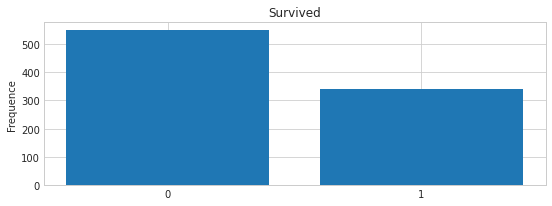

Survived:
 0    549
1    342
Name: Survived, dtype: int64


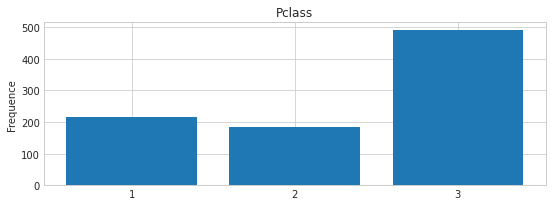

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


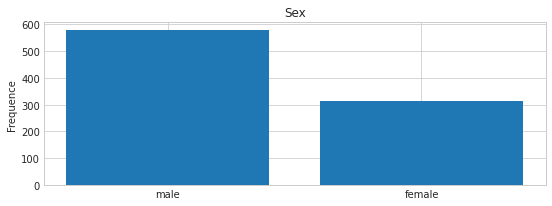

Sex:
 male      577
female    314
Name: Sex, dtype: int64


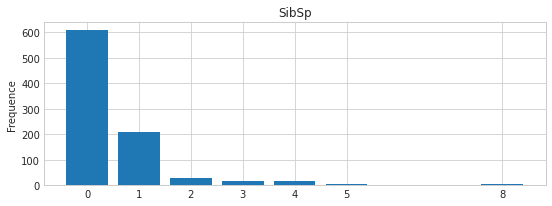

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


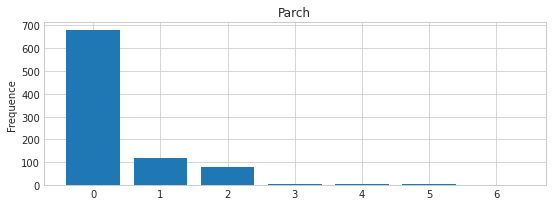

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


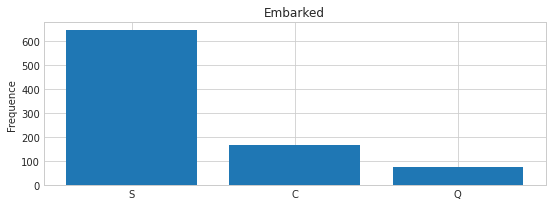

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:

category1=[ 'Survived', 'Pclass','Sex', 'SibSp',
       'Parch', 'Embarked']
for variable in category1:
    bar_plot(variable)
    

In [12]:
category2=['Name', 'Ticket', 'Cabin' ]
for i in category2:
    print("----{}----\n{} \n".format(i,train_df[i].value_counts()))

----Name----
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

----Ticket----
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

----Cabin----
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dty

#### When variables with multiple categories are plotted, we do not see much meaningful data.
Name ,Ticket,Cabin

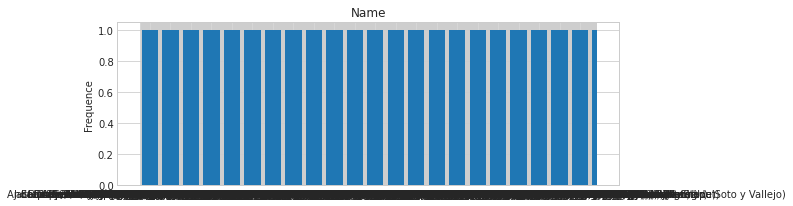

Name:
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


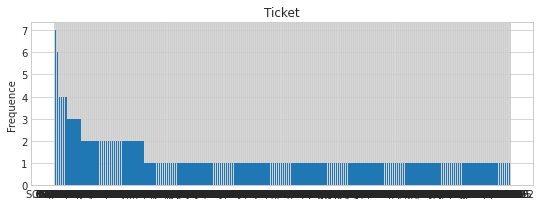

Ticket:
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


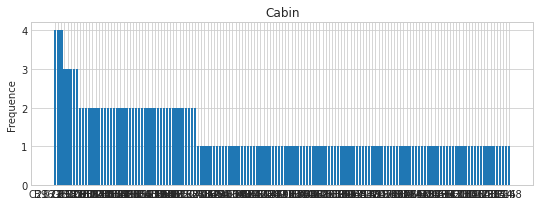

Cabin:
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [13]:
category2=['Name', 'Ticket', 'Cabin' ]
for variable in category2:
    bar_plot(variable)

<a id='5'></a><br>
> # 3.2 Numerical Variable Analysis<br>


In [14]:
def plot_hist(variable):
    """
    input : variable ex :PassengerId"
    output : bar plot  value count
    """
    #get feature
    var=train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))



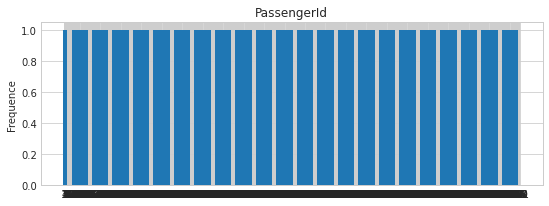

PassengerId:
 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


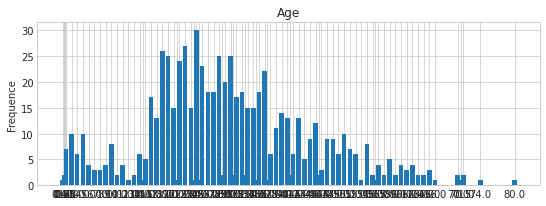

Age:
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


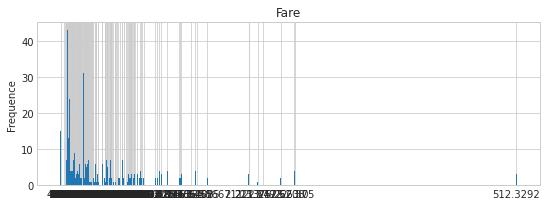

Fare:
 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [15]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hist(variable)

In [16]:
def plot_hisst1(variable):
    plt.figure(figsize=(25,10))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequence")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [17]:
# train_df.Fare.plot(kind = 'hist',figsize = (12,12),bins=50)
# plt.xlabel('assengerId')           
# plt.ylabel('frequance')
# plt.title('PassengerId histogram') 


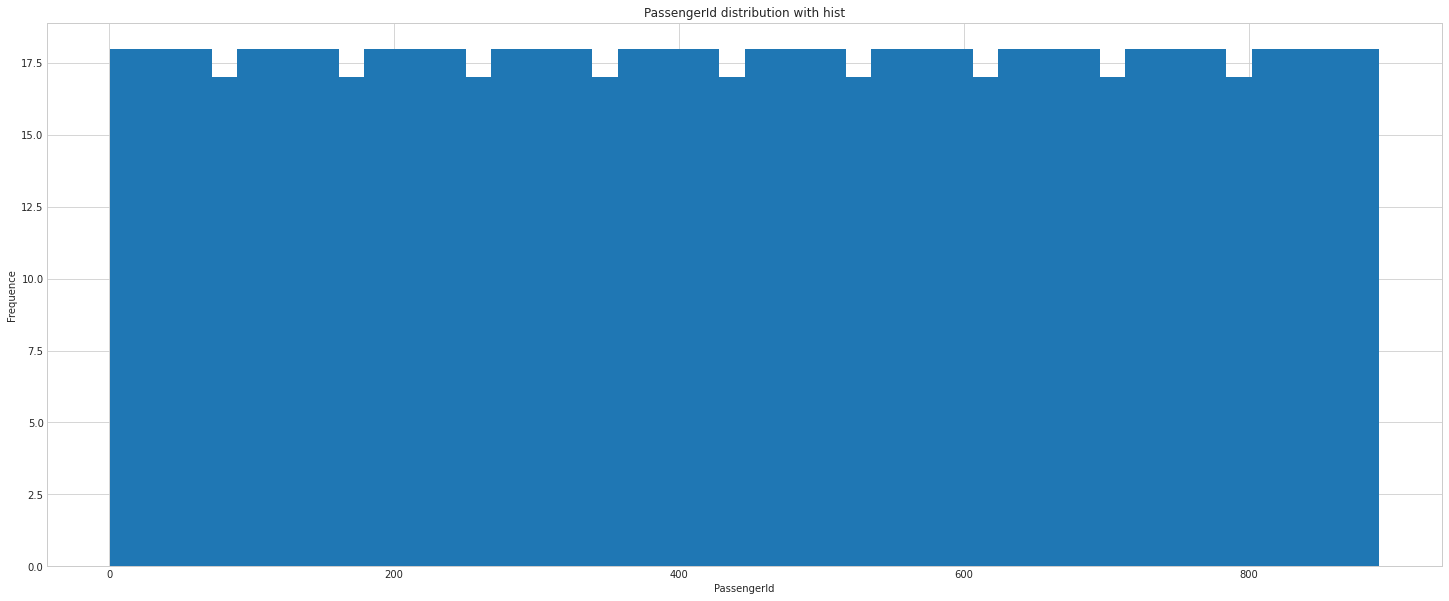

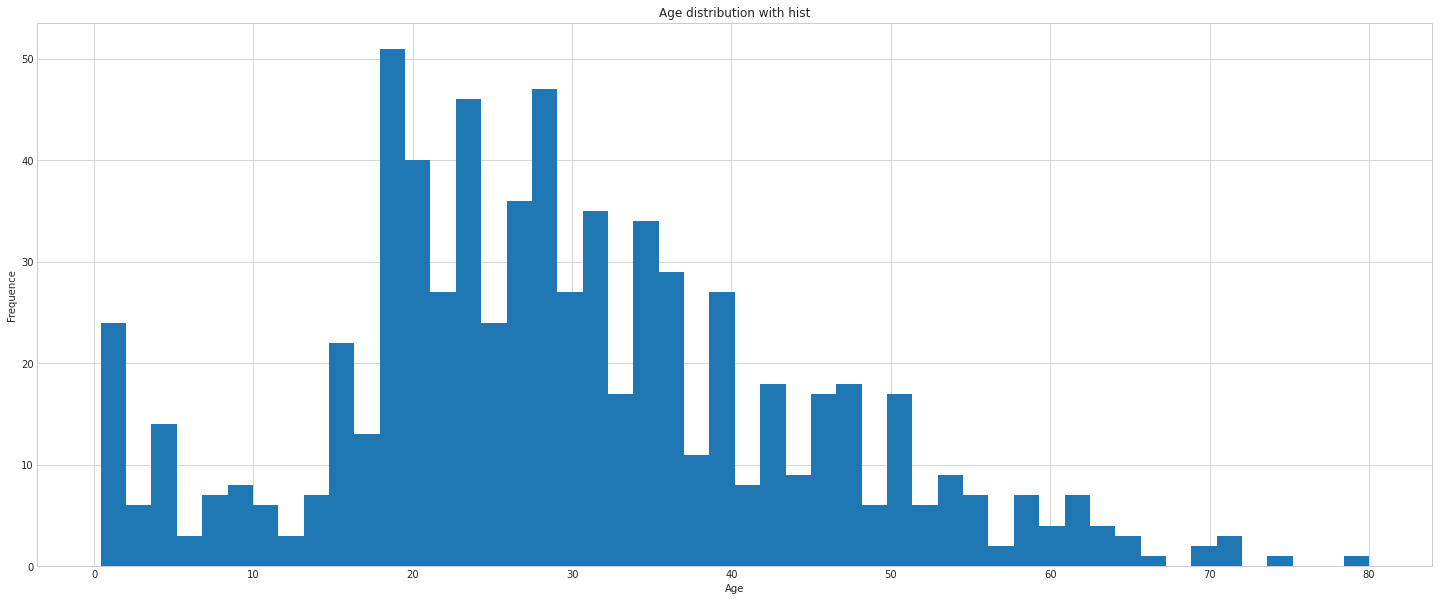

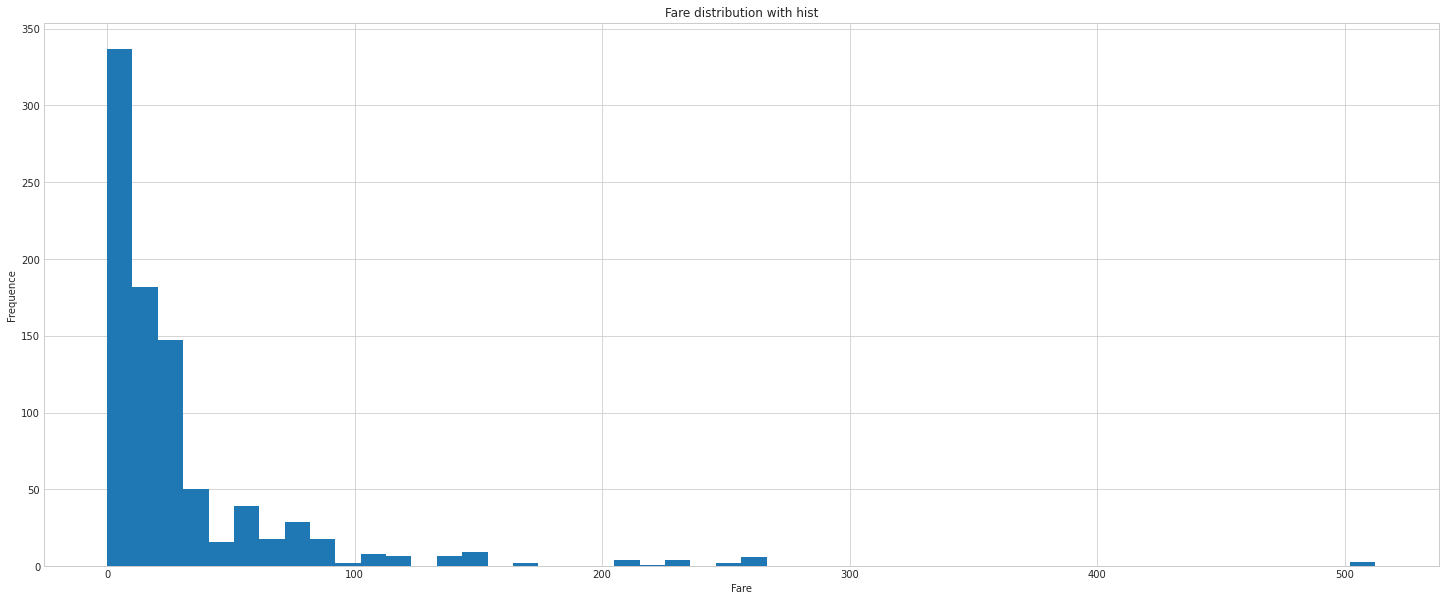

In [18]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hisst1(variable)

In [19]:
# train_df["Age"].plot(kind = 'hist',grid=True,alpha=0.9,subplots=True,figsize=(25,10),bins=50)


<a id='6'></a><br>
# 4. Basic Data Analysis<br>
* Pclass-Survived
* sex-Survived
* SibSp-Survived
* Parch-Survived


In [20]:
#Pclass-Survived
train_df[["Pclass","Survived","Sex"]].groupby(["Pclass","Sex"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,Pclass,Sex,Survived
5,3,male,0.135447
3,2,male,0.157407
1,1,male,0.368852
4,3,female,0.500000
2,2,female,0.921053
0,1,female,0.968085


In [21]:
pcS=train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(pcS,
                x='Pclass',
                y='Survived',
                color='Survived',
                text='Pclass',
                title='Pclass-Survived relationship',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(pcS)

   Pclass  Survived
2       3       491
0       1       216
1       2       184


In [22]:
pcSm=train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(pcSm,
                x='Pclass',
                y='Survived',
#                 base='Pclass',
                color='Survived',
                title='Pclass Survived mean relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(pcSm)


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [23]:
#"Sex","Survived"
ssm=train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(ssm,
                x='Sex',
                y='Survived',
                title='Sex Survived mean relationship ',
                color='Survived',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(ssm)


      Sex  Survived
0  female  0.742038
1    male  0.188908


In [24]:
#"Sex","Survived"
ss=train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(ss,
                x='Sex',
                y='Survived',
                color='Survived',
                title='Sex Survived relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(ss)

      Sex  Survived
1    male       577
0  female       314


In [25]:
sibSm=train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(sibSm,
                x='SibSp',
                y='Survived',
                color='Survived',
                title='SibSp Survived mean relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(sibSm)

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [26]:
sibS=train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(sibS,
                x='SibSp',
                y='Survived',
                color='Survived',
                title='SibSp Survived  relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(sibS)

   SibSp  Survived
0      0       608
1      1       209
2      2        28
4      4        18
3      3        16
6      8         7
5      5         5


In [27]:
parchSm=train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(parchSm,
                x='Parch',
                y='Survived',
                color='Survived',
                title='Parch Survived mean  relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(parchSm)

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [28]:
parchS=train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).count().sort_values(by="Survived",ascending=True)
fig=px.bar(parchS,
                x='Parch',
                y='Survived',
                color='Survived',
                title='Parch Survived relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(parchS)

   Parch  Survived
6      6         1
4      4         4
3      3         5
5      5         5
2      2        80
1      1       118
0      0       678


<a id='7'></a><br>
> # 5. Outlier Detecttion<br>
featuresthat corrupt our data


In [29]:
def detect_qoutliers(df,features):
    outlier_indices=[]
    
    for c in features:
        #1quartile
        Q1=np.percentile(df[c],25)
        #3quartile
        Q3=np.percentile(df[c],75)
        #IQR 
        IQR=Q3-Q1
        
        #Outlier step
        outlier_step=IQR*1.5
        
        #detect outlier and their indices
        outlier_list_col=df[(df[c]<Q1-outlier_step)|(df[c]>Q3+outlier_step)].index
        
        #store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)   
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)
    return multiple_outliers

In [30]:
train_df.loc[detect_qoutliers(train_df,['SibSp','Parch','Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [31]:
train_df=train_df.drop(detect_qoutliers(train_df,['SibSp','Parch','Fare']),axis=0).reset_index(drop=True)

In [32]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id='8'></a><br>
> # 6. Missing Value<br>




In [33]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [34]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<a id='9'></a><br>
> # 6.1 Find Missing Value<br>



In [36]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [37]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id='10'></a><br>
> # 6.2 Fill Missing Value<br>

* Embarked has 2 missing value
* Fare has only 1


In [38]:
train_df["Embarked"].isnull()
pd.isnull(train_df["Embarked"])

0       False
1       False
2       False
3       False
4       False
        ...  
1294    False
1295    False
1296    False
1297    False
1298    False
Name: Embarked, Length: 1299, dtype: bool

In [39]:
#train_df[train_df["Embarked"].isnull()]
train_df[pd.isnull(train_df["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

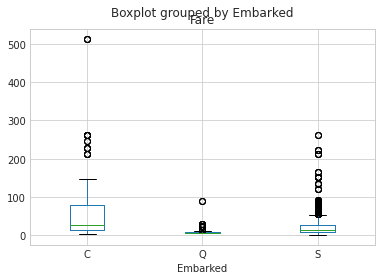

In [40]:
train_df.boxplot(column="Fare",by="Embarked")
#Buradaki boş değere sahip yolcualrın ödedikleri bilet parasına bakılırsa c limanından binmiş olma ihtimalleri çok yüksek
## Considering the ticket money paid by the passengers with empty values here, it is very likely that they got on from port c.

In [41]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[pd.isnull(train_df["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [42]:
train_df[pd.isnull(train_df["Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [43]:
mean_fare=np.mean(train_df[train_df["Pclass"]==3]["Fare"])

In [44]:
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [45]:
train_df[train_df["PassengerId"]==1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.74122,NaN,S


<a id='11'></a><br>
# 7. Visualization 


<a id='12'></a><br>
## Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

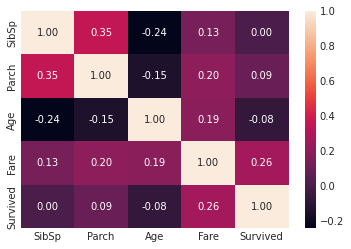

In [46]:
list1=["SibSp", "Parch" ,"Age" ,"Fare" ,"Survived"]
sns.heatmap(train_df[list1].corr(), annot=True , fmt=".2f")
plt.show()

Fare feature seems to have correaltion with survived feature(0.26)

<a id='13'></a><br>
## Sibsp-- Survived

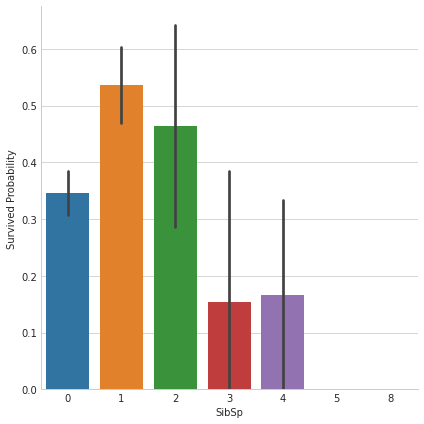

In [47]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

1. Having a lot of SibSp have less chance to survive.
1. if sibsp == 0 or 1 or 2, passenger has more chance to survive
1. we can consider a new feature describing these categories.

<a id='14'></a><br>
## Parch -- Survived

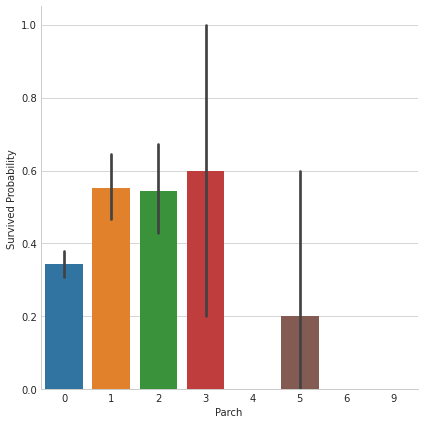

In [48]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

1. Sibsp and parch can be used for new feature extraction with th = 3
1. small familes have more chance to survive.
1. there is a std in survival of passenger with parch = 3

<a id='15'></a><br>
## Pclass -- Survived

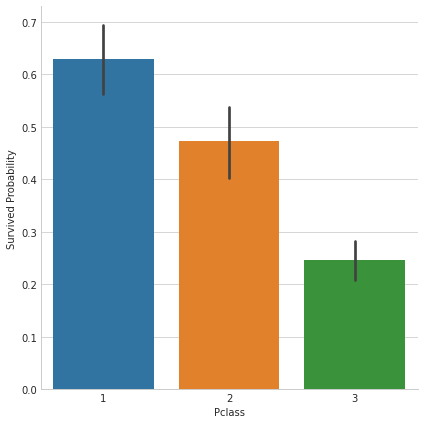

In [49]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

<a id='16'></a>
## Age -- Survived

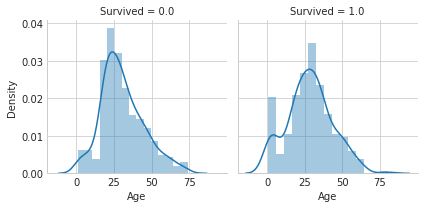

In [50]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 15)
plt.show()


# fig = px.histogram(train_df, x='Age',  color='Pclass',barmode='overlay',
#                 facet_col='Survived',width=500, height=400)
# fig.show()


* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a id='17'></a>
## Pclass -- Survived -- Age

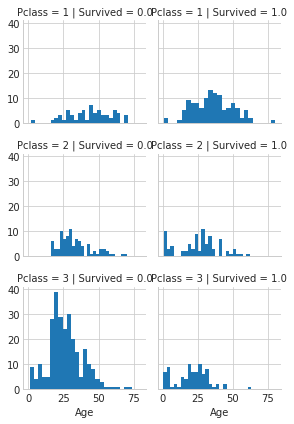

In [51]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

pclass is important feature for model training.

<a id='18'></a>
## Embarked -- Sex -- Pclass -- Survived

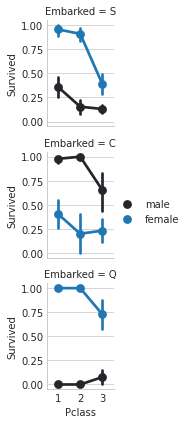

In [52]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survşval rate in pclass 3 in C.
* embarked and sex will be used in training.

<a id='19'></a>
## Embarked -- Sex -- Fare -- Survived

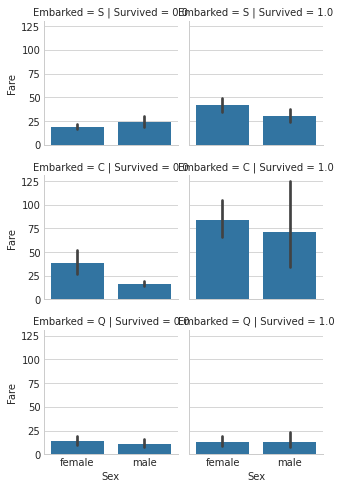

In [53]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Passsengers who pay higher fare have better survival. Fare can be used as categorical for training

<a id='20'></a>
## Fill Missing: Age Feature

In [54]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


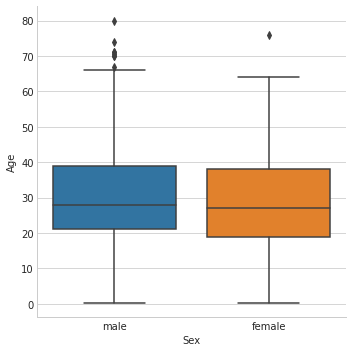

In [55]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

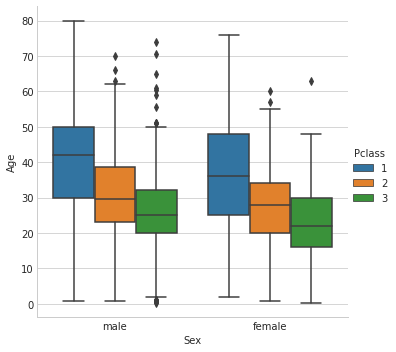

In [56]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

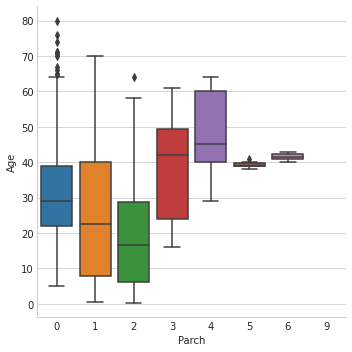

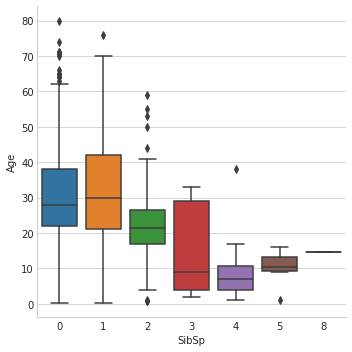

In [57]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [58]:
#train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

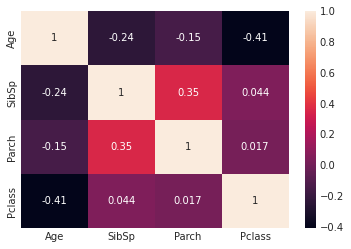

In [59]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.


In [60]:

index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [61]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
